<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/unsupervised-learning/PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# import some packages
import numpy as np
import matplotlib.pyplot as plt

For demonstration purposes, let's generate a synthetic dataset that is only 2 dimensional, and we will implement PCA to find the best axis to project to.

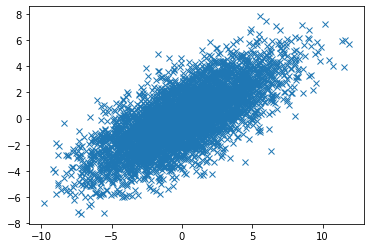

In [75]:
# generate 5000 2-dimensional gaussian distributed data points
# with high variance on the main diagonal
mean = [0, 0]
covariance = [[10, 5], [5, 5]]
x, y = np.random.multivariate_normal(mean, covariance, 5000).T
plt.plot(x, y, 'x')


In [79]:
# put x, y's into a design matrix.
X = [[x[i], y[i]] for i in range(len(x))]
X = np.asarray(X)

In [80]:
# we now have a 5000 data points in 2 dimensions.
X.shape

(5000, 2)

Now let's apply PCA to this dataset!


# Step1: standardize so mean = 0 and variance = 1

Since PCA is sensitive to variance in data, we need to standardize the data. To do this, we simply call a sklearn function.

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
X = StandardScaler().fit_transform(X)

After standardization X should have mean of 0 and variance of 1 in each column. Let's check that

In [91]:
# first column's mean
X[:,0].mean()

3.552713678800501e-17

In [92]:
# second column's mean
X[:,1].mean()

2.842170943040401e-18

In [93]:
# first column's variance
X[:, 0].var()

1.0000000000000018

In [95]:
# second column's variance
X[:, 1].var()

1.0000000000000013

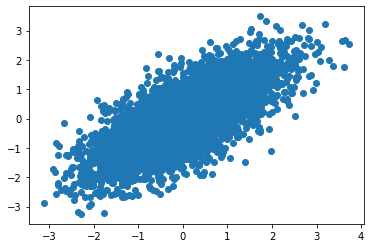

In [96]:
plt.scatter(X[:,0], X[:,1])

As we can see now the data are normalized such that data on each axis has mean 0 and variance 1. Let's proceed to the next step.

# 2. SVD or eigendecomposition on covariance matrix

you can either pick to eigendecompose $X^{T}X$ (the covariance matrix), or just do SVD on X. We'll pick the later method, although two methods should lead to the same results.

In [97]:
# s is the singular values (sqrt(eigenvalues)).
u, s, v = np.linalg.svd(X)

In [98]:
s

array([92.81428825, 37.2224112 ])

# 3. pick the highest eigenvalue eigenvector

Clearly we see that the first singular value is the greatest. So we pick the first vector within matrix v to be our projection vector.

In [103]:
v[0,:].reshape(-1,1)

array([[0.70710678],
       [0.70710678]])

# 4. plot the projection space in original space

In [122]:
[(v[0,:][0] * i, v[0,:][1] * i) for i in range(-5, 5)]

[(-3.5355339059327378, -3.5355339059327373),
 (-2.8284271247461903, -2.82842712474619),
 (-2.121320343559643, -2.1213203435596424),
 (-1.4142135623730951, -1.414213562373095),
 (-0.7071067811865476, -0.7071067811865475),
 (0.0, 0.0),
 (0.7071067811865476, 0.7071067811865475),
 (1.4142135623730951, 1.414213562373095),
 (2.121320343559643, 2.1213203435596424),
 (2.8284271247461903, 2.82842712474619)]

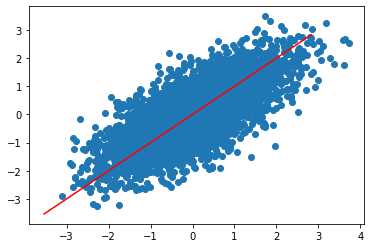

In [125]:
plt.scatter(X[:,0], X[:,1])
x = [v[0,:][0] * i for i in range(-5,5)]
y = [v[0,:][1] * i for i in range(-5,5)]
plt.plot(x, y, color = 'r')

the red line is our projection choice - looks pretty good! 

# 4. project original dataset to eigenspace. (reduce dimension)

In [104]:
projectionVector = v[0,:].reshape(-1,1)

In [108]:
X.shape

(5000, 2)

In [126]:
reducedX = X @ projectionVector

In [127]:
reducedX.shape

(5000, 1)

now this reducedX vector is only 1 dimensional compared to the original 2 dimensional dataset. now for any new coming data we can do the same projection.

In real machine learning projects we don't need to do these tedious things. We just need to call the PCA algorithm on sklearn library. The above algorithm just demonstrates that PCA is nothing but eigendecomposition with covariance matrix of the data. Underlying idea is really simple and easy to implement.